# House Price Prediction

# Problem statement :
    Developing a machine learning tool to predict house prices based on size, location, and features, users input details for accurate estimates, enhancing transparency and decision-making in real estate.

# Project Methodology
        Use machine learning to estimate the price of a house based on various factors like location, size, number of rooms, etc.Identify which factors most significantly influence house prices in a given area. Provide valuable insights to homebuyers, sellers, and real estate agents to make informed decisions about buying, selling, or investing in properties.Develop models that accurately predict house prices, reducing the uncertainty.Automate the process of price estimation, making it quicker and more efficient compared to traditional methods.Analyze historical data to understand patterns and trends in the real estate market, helping stakeholders anticipate future price movements. Enable users to compare predicted prices with actual sale prices to evaluate the effectiveness of the machine learning models.

# Column Description
    bhk : contains the number of bedroom, hall, kitchen collectively.
    type:contains the type of house, type can be one of the following:apartment, villa, independent house, studio apartment.
    locality: contains information about the locality of house.
    area: contains the area of house, unit of measurement is sq ft.
    Price: contains the price value for the house.
    price_unit : contains the price unit for the house which can be from given below: Cr(Crore), L(Lakh).
    region: contains the region of the house.
    status: contains information about the status of the house which can be either of given below:
        Ready to move -> the house is ready to use.
        Under Construction -> the house is currently under construction.
    age : contains the information regarding age of house which can any of below:
        New: a new house for sale.
        Resale: an old house for resale.

# Data and Packages Obtain

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sms

In [2]:
df=pd.read_excel('Mumbai House Prices.xlsx')
df 

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown


In [3]:
del[df['locality']]         #delete column of locality 

In [4]:
del[df['region']]                    #delete column of region 

In [5]:
df

,bhk,type,area,price,price_unit,status,age
0,3,Apartment,685,2.50,Cr,Ready to move,New
1,2,Apartment,640,52.51,L,Under Construction,New
2,2,Apartment,610,1.73,Cr,Under Construction,New
3,2,Apartment,876,59.98,L,Under Construction,New
4,2,Apartment,659,94.11,L,Under Construction,New
...,...,...,...,...,...,...,...
76033,3,Apartment,1527,7.00,Cr,Ready to move,Unknown
76034,5,Apartment,3049,12.00,Cr,Ready to move,Unknown
76035,4,Apartment,3313,10.00,Cr,Ready to move,Unknown
76036,2,Apartment,1305,4.25,Cr,Ready to move,Unknown


In [6]:
df.isnull()                # to check null values

,bhk,type,area,price,price_unit,status,age
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
76033,False,False,False,False,False,False,False
76034,False,False,False,False,False,False,False
76035,False,False,False,False,False,False,False
76036,False,False,False,False,False,False,False


In [7]:
# convert categerical data 'type','price_unit','status','age'into numerical
vals={'Apartment':0,'Villa':1,'Studio Apartment':2,'Independent House':3,'Penthouse':4,'Cr':0,'L':1,'Ready to move':0,'Under Construction':1,'New':0,'Resale':1,'Unknown':2}
cols=['type','price_unit','status','age']

for col in cols:
    df[col]= df[col].replace(vals)
    


In [8]:
df

,bhk,type,area,price,price_unit,status,age
0,3,0,685,2.50,0,0,0
1,2,0,640,52.51,1,1,0
2,2,0,610,1.73,0,1,0
3,2,0,876,59.98,1,1,0
4,2,0,659,94.11,1,1,0
...,...,...,...,...,...,...,...
76033,3,0,1527,7.00,0,0,2
76034,5,0,3049,12.00,0,0,2
76035,4,0,3313,10.00,0,0,2
76036,2,0,1305,4.25,0,0,2


In [9]:
df.info()         #information of given data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  int64  
 2   area        76038 non-null  int64  
 3   price       76038 non-null  float64
 4   price_unit  76038 non-null  int64  
 5   status      76038 non-null  int64  
 6   age         76038 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [10]:
df=df.drop_duplicates()       #to remove duplicate rows
df

,bhk,type,area,price,price_unit,status,age
0,3,0,685,2.50,0,0,0
1,2,0,640,52.51,1,1,0
2,2,0,610,1.73,0,1,0
3,2,0,876,59.98,1,1,0
4,2,0,659,94.11,1,1,0
...,...,...,...,...,...,...,...
76032,1,0,872,2.70,0,0,2
76033,3,0,1527,7.00,0,0,2
76034,5,0,3049,12.00,0,0,2
76035,4,0,3313,10.00,0,0,2


In [11]:
df

,bhk,type,area,price,price_unit,status,age
0,3,0,685,2.50,0,0,0
1,2,0,640,52.51,1,1,0
2,2,0,610,1.73,0,1,0
3,2,0,876,59.98,1,1,0
4,2,0,659,94.11,1,1,0
...,...,...,...,...,...,...,...
76032,1,0,872,2.70,0,0,2
76033,3,0,1527,7.00,0,0,2
76034,5,0,3049,12.00,0,0,2
76035,4,0,3313,10.00,0,0,2


In [12]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(['price'],axis=1) 
Y = df['price']  

In [13]:
X


,bhk,type,area,price_unit,status,age
0,3,0,685,0,0,0
1,2,0,640,1,1,0
2,2,0,610,0,1,0
3,2,0,876,1,1,0
4,2,0,659,1,1,0
...,...,...,...,...,...,...
76032,1,0,872,0,0,2
76033,3,0,1527,0,0,2
76034,5,0,3049,0,0,2
76035,4,0,3313,0,0,2


In [14]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
X_train

,bhk,type,area,price_unit,status,age
30138,2,0,765,0,0,1
37040,2,0,623,0,1,0
75499,1,0,665,1,0,1
13638,3,0,1900,0,1,0
5680,2,0,1010,1,0,0
...,...,...,...,...,...,...
15493,1,0,527,0,0,1
71935,1,0,700,1,0,1
57965,2,0,791,1,0,1
1403,3,0,1060,0,0,1


In [16]:
# Create a Linear Regression model
model = LinearRegression()

In [17]:
# Train the model using the training sets
model.fit(X_train, Y_train)

LinearRegression()

In [18]:
df.describe()

,bhk,type,area,price,price_unit,status,age
count,46824.000000,46824.000000,46824.000000,46824.000000,46824.000000,46824.000000,46824.000000
mean,1.974308,0.036456,992.703122,30.390501,0.485093,0.451756,0.629698
std,0.909718,0.270212,628.926509,32.819712,0.499783,0.497672,0.755397
min,1.000000,0.000000,127.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,634.000000,1.850000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,850.000000,9.460000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1150.000000,59.682500,1.000000,1.000000,1.000000
max,10.000000,4.000000,16000.000000,99.990000,1.000000,1.000000,2.000000


In [19]:
y_pred = model.predict(X_test)
y_pred

array([-1.58666795,  1.08615483,  0.93600296, ..., 57.42257771,
       -0.40778665, 11.50189233])

In [20]:
mse=mean_squared_error(Y_test,y_pred)
print('Mean squ error = ',mse)
mae=mean_absolute_error(Y_test,y_pred)
print('mean absoluate error = ',mae)
acc=r2_score(Y_test,y_pred)
print('accuracy of model for test data set = ',acc*100,'%')

Mean squ error =  234.4426034756835
mean absoluate error =  10.619968150757096
accuracy of model for test data set =  78.0392940876323 %


In [21]:
y_pred_train=model.predict(X_train)
mse_train=mean_squared_error(Y_train,y_pred_train)
print('Mean squ error of training data = ',mse_train)
mae_train=mean_absolute_error(Y_train,y_pred_train)
print('mean absoluate error of training data = ',mae_train)
acc_train=r2_score(Y_train,y_pred_train)
print('accuracy of model for test data set = ',acc_train*100,'%')

Mean squ error of training data =  237.23534010529752
mean absoluate error of training data =  10.684299430029556
accuracy of model for test data set =  78.02353964416523 %


# EDA (Exploratory Data Analysis):

,bhk,type,area,price,price_unit,status,age
count,46824.000000,46824.000000,46824.000000,46824.000000,46824.000000,46824.000000,46824.000000
mean,1.974308,0.036456,992.703122,30.390501,0.485093,0.451756,0.629698
std,0.909718,0.270212,628.926509,32.819712,0.499783,0.497672,0.755397
min,1.000000,0.000000,127.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,634.000000,1.850000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,850.000000,9.460000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1150.000000,59.682500,1.000000,1.000000,1.000000
max,10.000000,4.000000,16000.000000,99.990000,1.000000,1.000000,2.000000


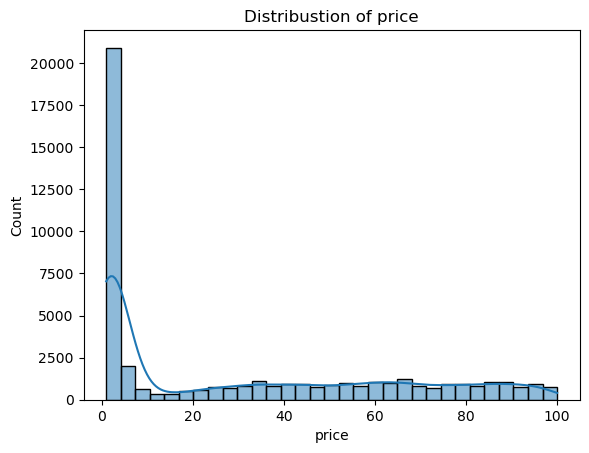

C:\Users\Pranali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


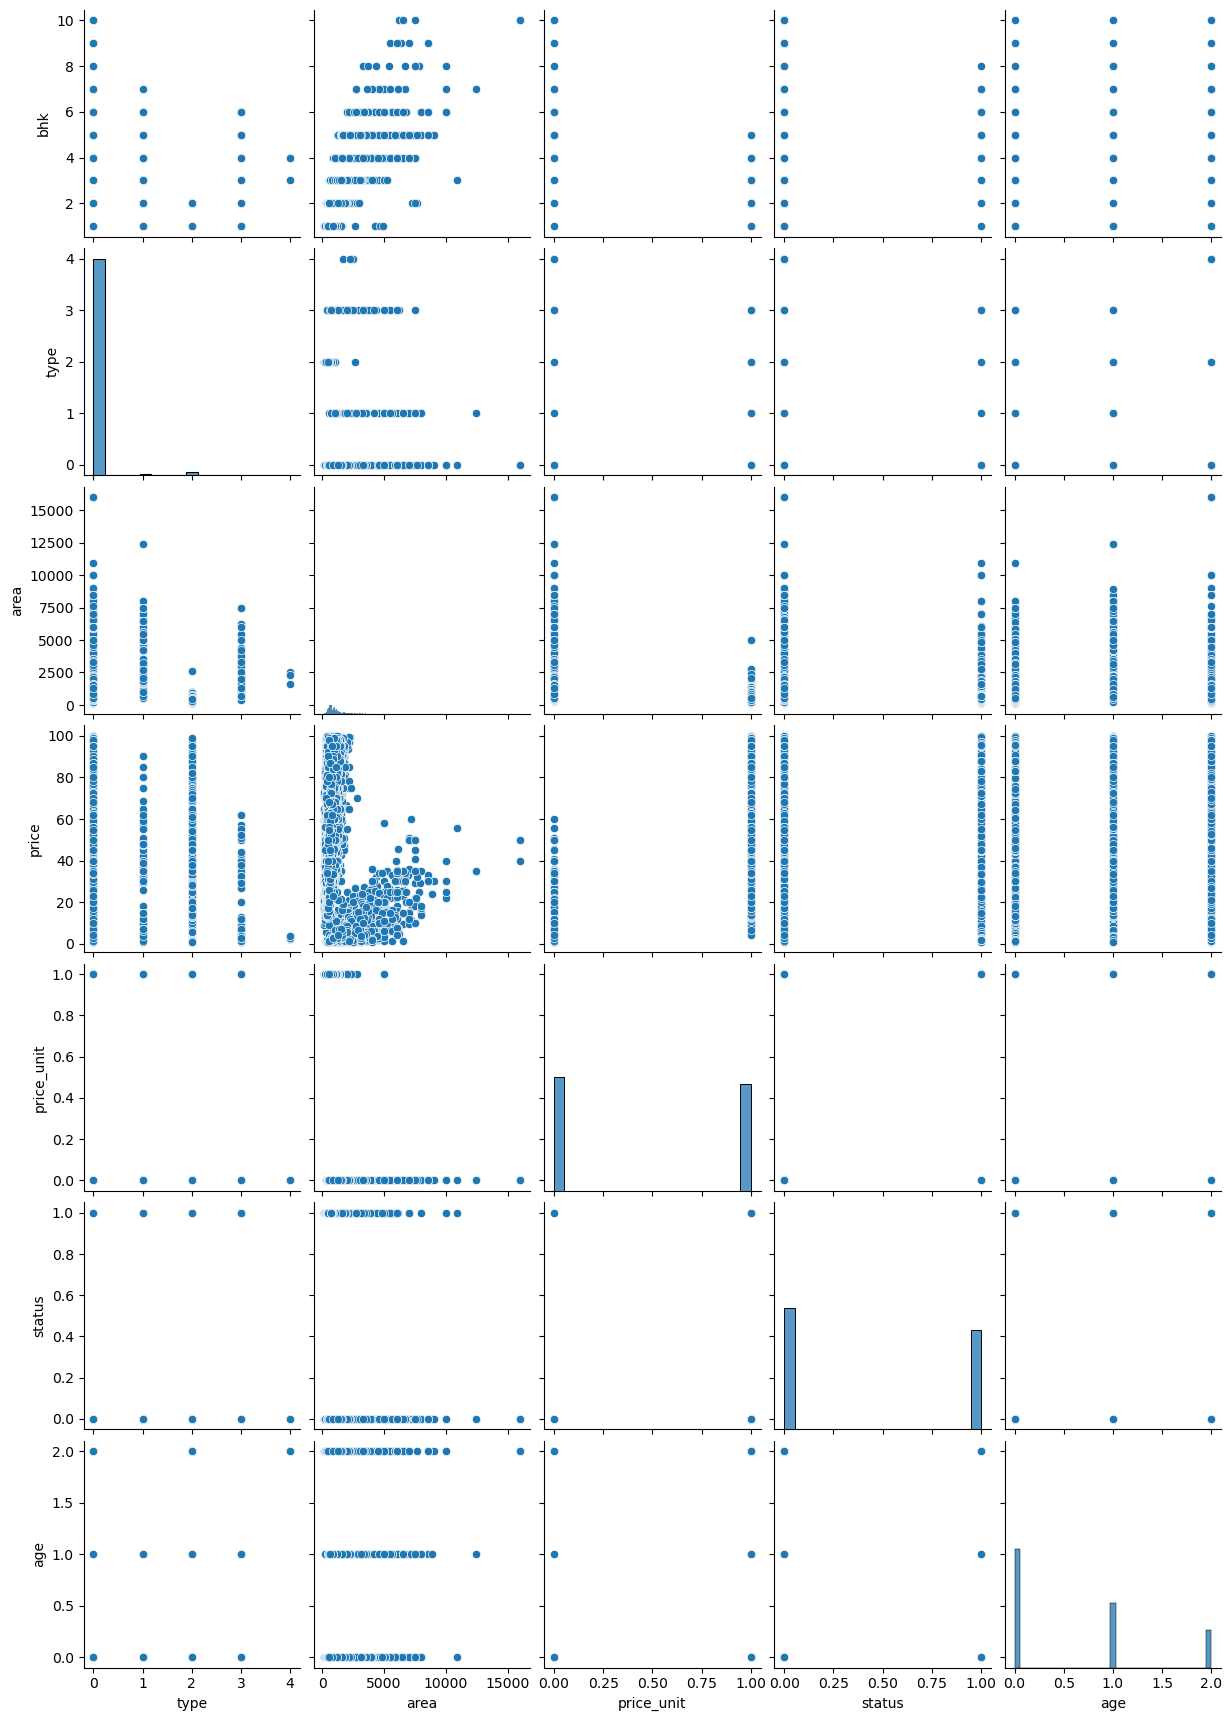

In [22]:
# Display summary Stat.
display(df.describe())
# Visualize the distribusion of target variable (price)
sms.histplot(df['price'],kde=True)
plt.title('Distribustion of price')
plt.show()
# Visualize the relationship between price and other Features
sms.pairplot(df,x_vars=['type','area','price_unit','status','age'])
plt.show()